In [71]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

In [31]:
data2 = pd.read_csv('bigData_cleaned2.csv', header=0, sep=',')
#data2=data2.iloc[:,1:]

In [32]:
df_only_derbies = data2[data2['derby']==1]
df_only_not_derbies =  data2[data2['derby']==0]
df_only_not_derbies

,team_1,team_2,team_1_rating,team_2_rating,capacity,stadium,month,derby,current_season,year,city,temprature,precipitation,attendance,occuper
0,Arsenal,Bolton Wanderers,5.0,20.0,38419.0,Highbury,may,0.0,1995/96,1995,London,14.0,52.1,38104.0,99.180093
1,Chelsea,Blackburn Rovers,11.0,7.0,40834.0,Stamford Bridge,may,0.0,1995/96,1995,London,14.0,52.1,28436.0,69.638047
2,Coventry City,Leeds United,16.0,13.0,23489.0,Highfield Road,may,0.0,1995/96,1995,Coventry,12.0,23.3,22769.0,96.934735
3,Everton,Aston Villa,6.0,4.0,39414.0,Goodison Park,may,0.0,1995/96,1995,Liverpool,12.0,53.6,40127.0,101.809002
4,Manchester City,Liverpool,18.0,3.0,35150.0,Maine Road,may,0.0,1995/96,1995,Manchester,12.0,21.2,31436.0,89.433855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,Everton,Stoke City,7.0,16.0,39414.0,Goodison Park,aug,0.0,2017/18,2017,Liverpool,16.0,66.6,39045.0,99.063784
8727,Southampton,Swansea City,11.0,12.0,32384.0,St. Mary's Stadium,aug,0.0,2017/18,2017,Southampton,17.0,10.9,31447.0,97.106596
8728,West Bromwich Albion,AFC Bournemouth,8.0,15.0,26445.0,The Hawthorns,aug,0.0,2017/18,2017,West Bromwich,16.0,27.0,25011.0,94.577425
8729,Brighton and Hove Albion,Manchester City,17.0,3.0,30666.0,Amex Stadium,aug,0.0,2017/18,2017,Falmer,17.0,24.0,30415.0,99.181504


<AxesSubplot:ylabel='derby'>

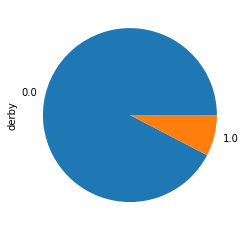

In [14]:
#Here we can see the ratio between number of games which are derbies in orange,
#And the not derbies games in blue, kind of like pacman shape
data2["derby"].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Derbies against not derbies')

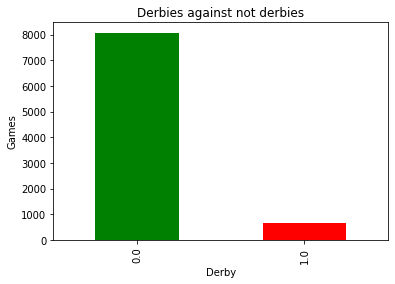

In [15]:
#Same, we want to see how many games are derbies and how many are not
#using bars this time, Y axis is the number of games eventually.
mycolors = ['#008000', '#FF0000']
data2["derby"].value_counts().plot(kind='bar', color = mycolors)
plt.ylabel('Games')
plt.xlabel('Derby')
plt.title('Derbies against not derbies')

<AxesSubplot:xlabel='occuper', ylabel='Density'>

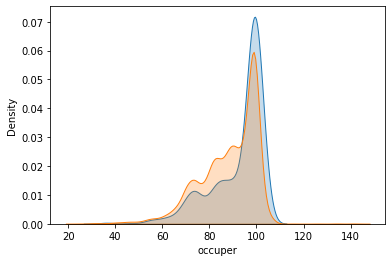

In [34]:
#the blue graph is all derby games, the orange is regular games
#we can excpect for the occuper in derby games to be higher
#because its central games witch is what happend here!
ax = sns.kdeplot(df_only_derbies.occuper, shade=True)
sns.kdeplot(df_only_not_derbies.occuper, shade=True)

<AxesSubplot:>

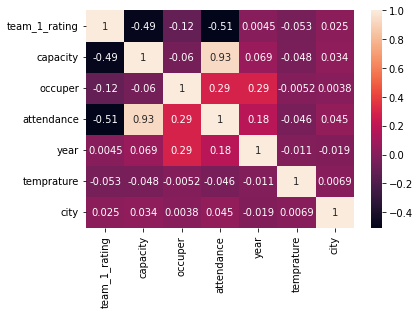

In [179]:
df_heat = pd.DataFrame(data2, columns = ['team_1_rating', 'capacity','occuper', 'attendance', 'year', 'temprature', 'city'])
sns.heatmap(df_heat.corr(), annot=True)

In [101]:
colormap = np.array(['b', 'r'])

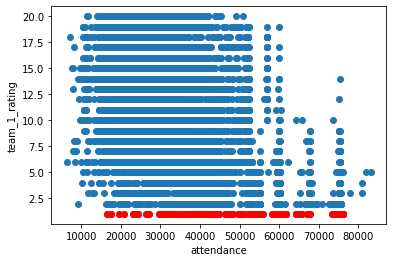

In [104]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(data2.attendance, data2.team_1_rating) #drawing all pokemons
plt.xlabel('attendance')
plt.ylabel('team_1_rating')
ax.scatter(data2.attendance[data2.team_1_rating==1], data2.team_1_rating[data2.team_1_rating==1], c='red') #drawing only derbies in red
plt.show()
#we can see that the first 

In [114]:
def curr_mean(data2, rating):
    return (data2[data2['team_1_rating']==rating])['attendance'].mean()

In [136]:
list_of_rating_attend= list()
for rating in range(1,21):
    list_of_rating_attend.append(curr_mean(data2, rating))
num_lst = list(range(1, 21))
len(list_of_rating_attend)

20

In [139]:
list_of_rating_attend
df_rating = pd.DataFrame(np.column_stack([list_of_rating_attend, num_lst]), 
                               columns=['attend mean', 'rating'])
df_rating

,attend mean,rating
0,50034.276688,1.0
1,47174.453933,2.0
2,44794.051802,3.0
3,42192.168142,4.0
4,40043.711409,5.0
5,36862.727064,6.0
6,34701.947368,7.0
7,32189.502242,8.0
8,31101.321759,9.0
9,30188.224537,10.0


In [186]:
data2[['attendance', 'capacity']].corr()
data2[['attendance', 'capacity']].corr(method='spearman')

,attendance,capacity
attendance,1.000000,0.921596
capacity,0.921596,1.000000


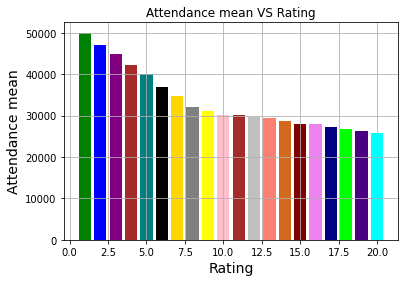

In [160]:
New_Colors = ['green','blue','purple','brown','teal','black', 'gold', 'grey', 'yellow', 'pink', 'brown', 'silver', 'salmon', 'chocolate',  'maroon', 'violet', 'navy', 'lime', 'indigo', 'cyan'] 
plt.bar(df_rating['rating'],df_rating['attend mean'], color = New_Colors)
plt.title('Attendance mean VS Rating')
plt.xlabel('Rating',fontsize=14)
plt.ylabel('Attendance mean',fontsize=14)
plt.grid(True)
plt.show()

In [164]:
data3 = data2.copy()

In [175]:
def season_to_numeric(df, cities_set):
    df['city']=df['city'].astype('category')
    replace_map={}
    for i,city in enumerate(cities_set):
        replace_map[city]=i
    df.replace(replace_map, inplace=True)

In [176]:
#creation of cities_dict
#cities_dict=dict.fromkeys(cities)
#creation of cities_dict
#for current_city,i in enumerate(cities_dict):
#cities_dict[i]=current_city
cities_set = set(data2['city'])

In [177]:
season_to_numeric(data2,cities_set)

In [178]:
data2

,team_1,team_2,team_1_rating,team_2_rating,capacity,stadium,month,derby,current_season,year,city,temprature,precipitation,attendance,occuper
0,Arsenal,Bolton Wanderers,5.0,20.0,38419.0,Highbury,may,0.0,1995/96,1995,20,14.0,52.1,38104.0,99.180093
1,Chelsea,Blackburn Rovers,11.0,7.0,40834.0,Stamford Bridge,may,0.0,1995/96,1995,20,14.0,52.1,28436.0,69.638047
2,Coventry City,Leeds United,16.0,13.0,23489.0,Highfield Road,may,0.0,1995/96,1995,16,12.0,23.3,22769.0,96.934735
3,Everton,Aston Villa,6.0,4.0,39414.0,Goodison Park,may,0.0,1995/96,1995,0,12.0,53.6,40127.0,101.809002
4,Manchester City,0,18.0,3.0,35150.0,Maine Road,may,0.0,1995/96,1995,30,12.0,21.2,31436.0,89.433855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,Everton,Stoke City,7.0,16.0,39414.0,Goodison Park,aug,0.0,2017/18,2017,0,16.0,66.6,39045.0,99.063784
8727,25,Swansea City,11.0,12.0,32384.0,St. Mary's Stadium,aug,0.0,2017/18,2017,25,17.0,10.9,31447.0,97.106596
8728,West Bromwich Albion,AFC Bournemouth,8.0,15.0,26445.0,The Hawthorns,aug,0.0,2017/18,2017,29,16.0,27.0,25011.0,94.577425
8729,Brighton and Hove Albion,Manchester City,17.0,3.0,30666.0,Amex Stadium,aug,0.0,2017/18,2017,2,17.0,24.0,30415.0,99.181504


In [180]:
data2


,team_1,team_2,team_1_rating,team_2_rating,capacity,stadium,month,derby,current_season,year,city,temprature,precipitation,attendance,occuper
0,Arsenal,Bolton Wanderers,5.0,20.0,38419.0,Highbury,may,0.0,1995/96,1995,20,14.0,52.1,38104.0,99.180093
1,Chelsea,Blackburn Rovers,11.0,7.0,40834.0,Stamford Bridge,may,0.0,1995/96,1995,20,14.0,52.1,28436.0,69.638047
2,Coventry City,Leeds United,16.0,13.0,23489.0,Highfield Road,may,0.0,1995/96,1995,16,12.0,23.3,22769.0,96.934735
3,Everton,Aston Villa,6.0,4.0,39414.0,Goodison Park,may,0.0,1995/96,1995,0,12.0,53.6,40127.0,101.809002
4,Manchester City,0,18.0,3.0,35150.0,Maine Road,may,0.0,1995/96,1995,30,12.0,21.2,31436.0,89.433855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,Everton,Stoke City,7.0,16.0,39414.0,Goodison Park,aug,0.0,2017/18,2017,0,16.0,66.6,39045.0,99.063784
8727,25,Swansea City,11.0,12.0,32384.0,St. Mary's Stadium,aug,0.0,2017/18,2017,25,17.0,10.9,31447.0,97.106596
8728,West Bromwich Albion,AFC Bournemouth,8.0,15.0,26445.0,The Hawthorns,aug,0.0,2017/18,2017,29,16.0,27.0,25011.0,94.577425
8729,Brighton and Hove Albion,Manchester City,17.0,3.0,30666.0,Amex Stadium,aug,0.0,2017/18,2017,2,17.0,24.0,30415.0,99.181504
